# Imports

In [135]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
import re
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [136]:
year = 2022
gp_round = 7
ses = 'Q'

In [137]:
driver_1 = 'VER'
driver_2 = 'LEC'

In [138]:
events_list = ff1.get_event_schedule(2022)[2:]
events_list_2021 = ff1.get_event_schedule(2021)[2:]
country_abbrev = ['BHR','SAU','AUS','ERO','MIA','ESP','MCO','AZE','CAN','GBR','AUT','FRA','HUN','BEL','NLD','ITA','SGP','JPN','USA','MXC','SAO','ABD']
events_list['CountryAbbreviation'] = country_abbrev

In [139]:
events_list_2021

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,2,Italy,Imola,FORMULA 1 PIRELLI GRAN PREMIO DEL MADE IN ITALY E DELL’EMILIA ROMAGNA 2021,2021-04-18,Emilia Romagna Grand Prix,conventional,Practice 1,2021-04-16,Practice 2,2021-04-16,Practice 3,2021-04-17,Qualifying,2021-04-17,Race,2021-04-18,True
3,3,Portugal,Portimão,FORMULA 1 HEINEKEN GRANDE PRÉMIO DE PORTUGAL 2021,2021-05-02,Portuguese Grand Prix,conventional,Practice 1,2021-04-30,Practice 2,2021-04-30,Practice 3,2021-05-01,Qualifying,2021-05-01,Race,2021-05-02,True
4,4,Spain,Montmeló,FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2021,2021-05-09,Spanish Grand Prix,conventional,Practice 1,2021-05-07,Practice 2,2021-05-07,Practice 3,2021-05-08,Qualifying,2021-05-08,Race,2021-05-09,True
5,5,Monaco,Monte-Carlo,FORMULA 1 GRAND PRIX DE MONACO 2021,2021-05-23,Monaco Grand Prix,conventional,Practice 1,2021-05-20,Practice 2,2021-05-20,Practice 3,2021-05-22,Qualifying,2021-05-22,Race,2021-05-23,True
6,6,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2021,2021-06-06,Azerbaijan Grand Prix,conventional,Practice 1,2021-06-04,Practice 2,2021-06-04,Practice 3,2021-06-05,Qualifying,2021-06-05,Race,2021-06-06,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,18,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2021,2021-11-07,Mexico City Grand Prix,conventional,Practice 1,2021-11-05,Practice 2,2021-11-05,Practice 3,2021-11-06,Qualifying,2021-11-06,Race,2021-11-07,True
19,19,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2021,2021-11-14,São Paulo Grand Prix,sprint,Practice 1,2021-11-12,Qualifying,2021-11-12,Practice 2,2021-11-13,Sprint Qualifying,2021-11-13,Race,2021-11-14,True
20,20,Qatar,Al Daayen,FORMULA 1 OOREDOO QATAR GRAND PRIX 2021,2021-11-21,Qatar Grand Prix,conventional,Practice 1,2021-11-19,Practice 2,2021-11-19,Practice 3,2021-11-20,Qualifying,2021-11-20,Race,2021-11-21,True
21,21,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2021,2021-12-05,Saudi Arabian Grand Prix,conventional,Practice 1,2021-12-03,Practice 2,2021-12-03,Practice 3,2021-12-04,Qualifying,2021-12-04,Race,2021-12-05,True


In [140]:
session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '11', '1', '4', '63', '14', '44', '5', '31', '22', '77', '20', '3', '47', '23', '10', '18', '6', '24']


In [141]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,CountryAbbreviation
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True,BHR
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True,SAU
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True,AUS
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True,ERO
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True,JPN
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True,USA
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True,MXC
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True,SAO


In [142]:
session_dict = {'conventional': ['Practice 1', 'Practice 2', 'Practice 3', 'Qualifying', 'Race'],
                'sprint': ['Practice 1', 'Qualifying', 'Practice 2', 'Sprint', 'Race']}

In [143]:
results = session.results

In [144]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-28 14:54:33.496,0 days 01:09:33.102000,,1318.349722,0 days 00:00:00,11191,276,7,100,False,12,interpolation,0.017999,0.000005,OnTrack,-7665,-6549,500
3,2022-05-28 14:54:33.625,0 days 01:09:33.231000,,1318.349722,0 days 00:00:00.129000,11248,278,7,100,False,12,car,9.986667,0.003051,OnTrack,-7671,-6469,501
4,2022-05-28 14:54:33.641,0 days 01:09:33.247000,,1318.349722,0 days 00:00:00.145000,11241,279,7,100,False,12,pos,11.227293,0.003430,OnTrack,-7672,-6458,502
5,2022-05-28 14:54:33.785,0 days 01:09:33.391000,5,1318.349722,0 days 00:00:00.289000,11235,280,7,100,False,12,car,22.431111,0.006853,OnTrack,-7678,-6346,502
6,2022-05-28 14:54:33.801,0 days 01:09:33.407000,5,1312.716389,0 days 00:00:00.305000,11291,281,7,100,False,12,pos,23.679449,0.007234,OnTrack,-7679,-6334,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2022-05-28 14:55:44.386,0 days 01:10:43.992000,5,1172.469444,0 days 00:01:10.890000,10801,268,7,100,False,12,car,3230.847778,0.987003,OnTrack,-7638,-6962,502
533,2022-05-28 14:55:44.420,0 days 01:10:44.026000,5,1167.595370,0 days 00:01:10.924000,10801,269,7,100,False,12,pos,3233.403542,0.987784,OnTrack,-7642,-6921,502
534,2022-05-28 14:55:44.601,0 days 01:10:44.207000,5,1162.721296,0 days 00:01:11.105000,10801,270,7,100,False,12,pos,3247.071040,0.991959,OnTrack,-7660,-6653,502
535,2022-05-28 14:55:44.666,0 days 01:10:44.272000,5,1157.847222,0 days 00:01:11.170000,10801,272,7,100,False,12,car,3252.003333,0.993466,OnTrack,-7665,-6572,502


In [145]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:59.917000,27.6,37.0,1004.0,False,55.3,344,0.8
1,0 days 00:01:59.913000,27.6,37.0,1004.0,False,55.3,3,0.8
2,0 days 00:02:59.934000,27.6,38.0,1004.0,False,54.8,328,0.6
3,0 days 00:03:59.929000,27.6,39.0,1004.0,False,54.8,313,1.0
4,0 days 00:04:59.925000,27.5,39.0,1004.2,False,53.0,303,1.1
...,...,...,...,...,...,...,...,...
76,0 days 01:17:00.275000,26.5,42.0,1003.2,False,45.6,0,0.8
77,0 days 01:18:00.300000,26.6,42.0,1003.2,False,45.3,0,0.3
78,0 days 01:19:00.304000,26.7,44.0,1003.0,False,44.7,176,0.5
79,0 days 01:20:00.309000,26.6,43.0,1003.2,False,44.5,0,1.0


In [146]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series, num):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[num:-3])
        
    return t_list_str

In [147]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [148]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])

In [149]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [150]:
def plot_stacked_data():
    
    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

    fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
    fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
    
    return fig

plot_stacked_data()

In [151]:
def plot_unstacked_data():

    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

    fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

    fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
    fig.update_yaxes(title_text="Gear", row=2, col=1)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
    fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

    fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
    return fig

plot_unstacked_data()

In [152]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 00:20:38.316000,16,0 days 00:01:14.892000,2,1,NaT,NaT,0 days 00:00:20.134000,0 days 00:00:35.102000,0 days 00:00:19.656000,0 days 00:19:43.558000,0 days 00:20:18.660000,0 days 00:20:38.316000,211.0,197.0,270.0,282.0,False,SOFT,2.0,True,0 days 00:19:23.424000,Ferrari,LEC,1,True,2022-05-28 14:04:23.818
3,0 days 00:23:36.898000,16,0 days 00:01:12.939000,4,1,NaT,NaT,0 days 00:00:19.351000,0 days 00:00:34.263000,0 days 00:00:19.325000,0 days 00:22:43.310000,0 days 00:23:17.573000,0 days 00:23:36.898000,218.0,202.0,269.0,283.0,False,SOFT,4.0,True,0 days 00:22:23.959000,Ferrari,LEC,1,True,2022-05-28 14:07:24.353
5,0 days 00:26:29.828000,16,0 days 00:01:12.569000,6,1,NaT,NaT,0 days 00:00:19.174000,0 days 00:00:34.060000,0 days 00:00:19.335000,0 days 00:25:36.433000,0 days 00:26:10.493000,0 days 00:26:29.828000,218.0,202.0,265.0,281.0,False,SOFT,6.0,True,0 days 00:25:17.259000,Ferrari,LEC,1,True,2022-05-28 14:10:17.653
10,0 days 00:48:20.036000,16,0 days 00:01:12.092000,11,2,NaT,NaT,0 days 00:00:19.141000,0 days 00:00:33.913000,0 days 00:00:19.038000,0 days 00:47:27.085000,0 days 00:48:00.998000,0 days 00:48:20.036000,220.0,200.0,269.0,281.0,False,SOFT,3.0,True,0 days 00:47:07.944000,Ferrari,LEC,1,True,2022-05-28 14:32:08.338
13,0 days 00:52:41.040000,16,0 days 00:01:11.864000,14,2,NaT,NaT,0 days 00:00:18.907000,0 days 00:00:33.928000,0 days 00:00:19.029000,0 days 00:51:48.083000,0 days 00:52:22.011000,0 days 00:52:41.040000,221.0,204.0,268.0,283.0,False,SOFT,6.0,True,0 days 00:51:29.176000,Ferrari,LEC,1,True,2022-05-28 14:36:29.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0 days 00:21:38.754000,6,0 days 00:01:16.358000,4,1,NaT,NaT,0 days 00:00:20.459000,0 days 00:00:35.906000,0 days 00:00:19.993000,0 days 00:20:42.855000,0 days 00:21:18.761000,0 days 00:21:38.754000,207.0,194.0,271.0,284.0,False,SOFT,4.0,True,0 days 00:20:22.396000,Williams,LAT,1,True,2022-05-28 14:05:22.790
389,0 days 00:24:32.164000,6,0 days 00:01:15.638000,6,1,NaT,NaT,0 days 00:00:19.998000,0 days 00:00:35.597000,0 days 00:00:20.043000,0 days 00:23:36.524000,0 days 00:24:12.121000,0 days 00:24:32.164000,210.0,188.0,268.0,281.0,False,SOFT,6.0,True,0 days 00:23:16.526000,Williams,LAT,1,True,2022-05-28 14:08:16.920
392,0 days 00:29:46.443000,6,0 days 00:01:14.570000,9,2,NaT,NaT,0 days 00:00:19.660000,0 days 00:00:35.180000,0 days 00:00:19.730000,0 days 00:28:51.533000,0 days 00:29:26.713000,0 days 00:29:46.443000,215.0,196.0,271.0,286.0,False,SOFT,3.0,True,0 days 00:28:31.873000,Williams,LAT,1,True,2022-05-28 14:13:32.267
395,0 days 00:37:59.345000,6,0 days 00:01:14.403000,12,3,NaT,NaT,0 days 00:00:19.904000,0 days 00:00:35.010000,0 days 00:00:19.489000,0 days 00:37:04.846000,0 days 00:37:39.856000,0 days 00:37:59.345000,209.0,196.0,271.0,285.0,True,SOFT,3.0,True,0 days 00:36:44.942000,Williams,LAT,1,True,2022-05-28 14:21:45.336


In [153]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry
lap_1 = lap_1[lap_1['Source'] != 'pos'].reset_index(drop=True)
lap_2 = lap_2[lap_2['Source'] != 'pos'].reset_index(drop=True)

In [154]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^'],
                   8: [700, 350, '>'],
}

for i in range(1,23):
    if i in start_line_dict:
        continue
    else:
        start_line_dict[i] = [0, 0, '<']
    
start_line_dict

{1: [120, 1280, '^'],
 2: [-1341, 2800, '<'],
 3: [-1228, 100, '<'],
 4: [-1533, -650, '<'],
 5: [2633, 128, '>'],
 6: [25, -469, '<'],
 7: [-8065, -6549, '^'],
 8: [700, 350, '>'],
 9: [0, 0, '<'],
 10: [0, 0, '<'],
 11: [0, 0, '<'],
 12: [0, 0, '<'],
 13: [0, 0, '<'],
 14: [0, 0, '<'],
 15: [0, 0, '<'],
 16: [0, 0, '<'],
 17: [0, 0, '<'],
 18: [0, 0, '<'],
 19: [0, 0, '<'],
 20: [0, 0, '<'],
 21: [0, 0, '<'],
 22: [0, 0, '<']}

In [155]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

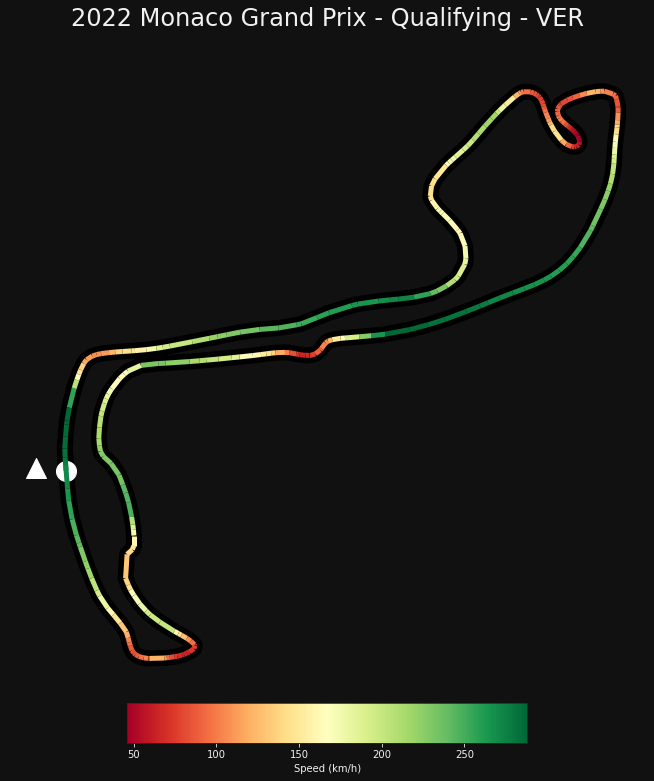

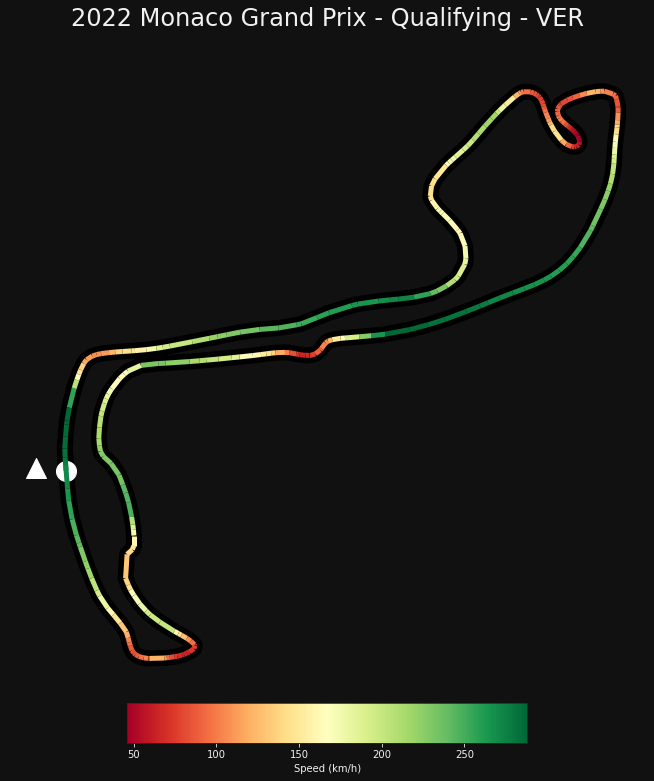

In [156]:
def plot_track_speed():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['Speed'])

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_speed()

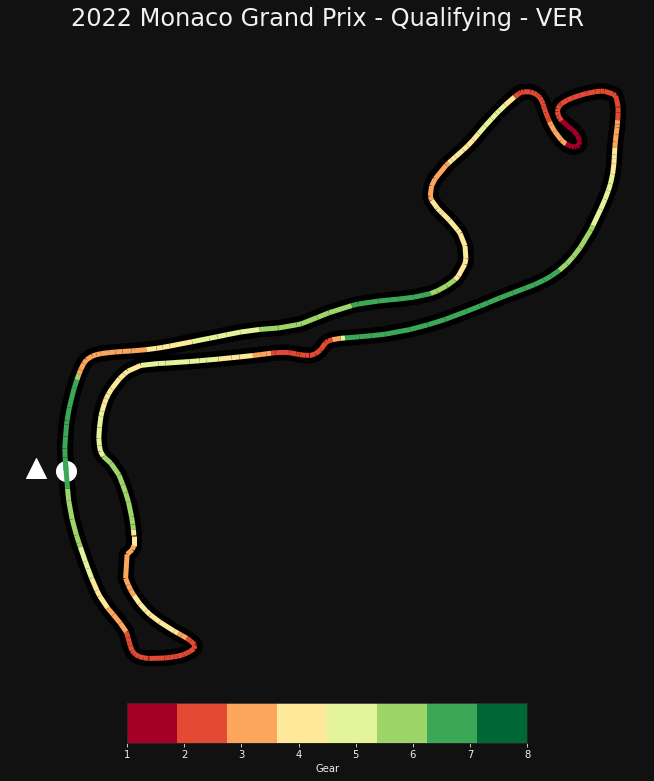

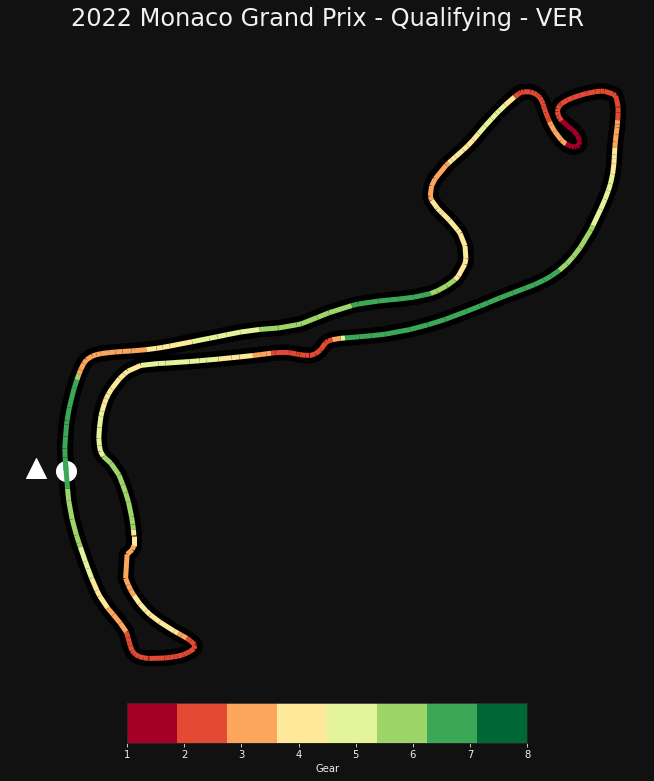

In [157]:
def plot_track_gear():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a norm to map from data points to colors
    norm = plt.Normalize(1, colormap_gear.N+1)
    lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['nGear'].to_numpy().astype(float))

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Create a color bar as a legend
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_gear()

In [158]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

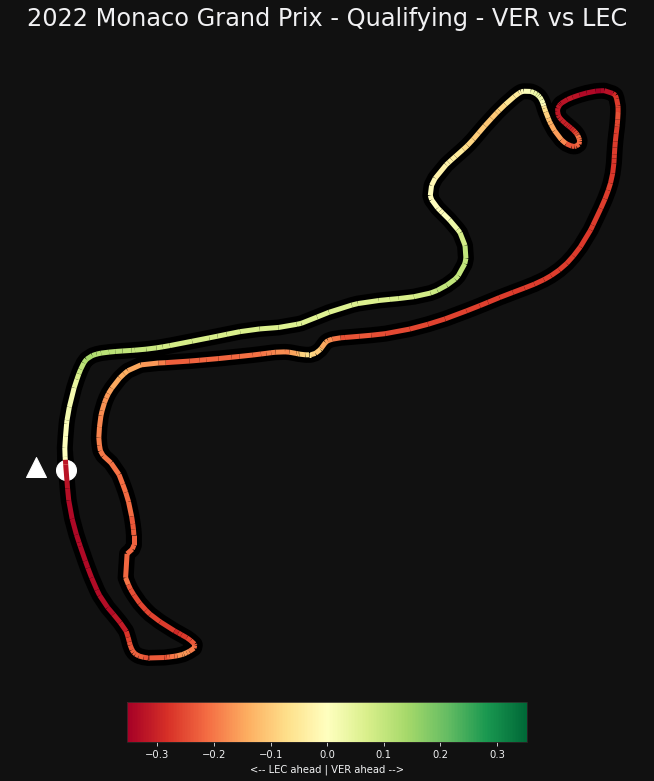

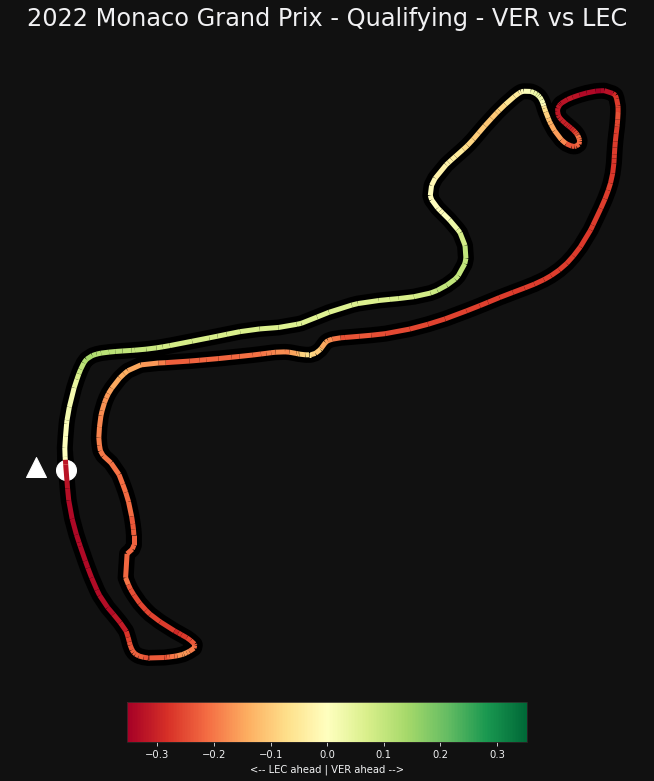

In [159]:
def plot_track_delta():

    # Determine boundaries for the colorbar
    vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(vmin, vmax)
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(delta_time)

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_delta()

In [160]:
race = session.laps
race = race.sort_values('Time').reset_index(drop=True)

# Tests

In [161]:
# Ergast API base request
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [162]:
# Get drivers standings
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
    
    df_drivers = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_drivers.columns = df_drivers.columns + 1
    df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
    df_drivers.sort_values(by=df_drivers.columns[-1], ascending=False, inplace=True)
    return df_drivers

df_drivers = update_driver_standings(22)
df_drivers.to_csv('../data/drivers_standings.csv')

In [163]:
# Get constructors standings
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    df_constructors = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_constructors.columns = df_constructors.columns + 1
    df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
    df_constructors.sort_values(by=df_constructors.columns[-1], ascending=False, inplace=True)
    return df_constructors

df_constructors = update_constructor_standings(22)
df_constructors.to_csv('../data/constructors_standings.csv')

In [164]:
df_drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [165]:
def plot_compare_points(df_drivers):
    
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation

    df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
    df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
    df_drivers_line
    
    driver_1_team_color = '#' + results[results['Abbreviation'] == driver_1]['TeamColor'][0]
    driver_2_team_color = '#' + results[results['Abbreviation'] == driver_2]['TeamColor'][0]
    hovertemplate = 'Points: %{y}'

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_1], name=driver_1, line_color=driver_1_team_color, hovertemplate=hovertemplate))
    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_2], name=driver_2, line_color=driver_2_team_color, hovertemplate=hovertemplate))

    fig.update_xaxes(tickangle=45)
    fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", yaxis_title="Points", title_x=0.5)
    return fig

In [166]:
plot_compare_points(df_drivers_standings)

In [167]:
round_mapping = {}
for i in events_list.itertuples():
    round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation

df_constructors.columns = df_constructors.columns.map(round_mapping)
df_constructors

,nan,nan,nan,nan,nan,nan,nan
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [168]:
df_constructors_standings = pd.read_csv('../data/constructors_standings.csv', index_col=0)
df_constructors_standings

,1,2,3,4,5,6,7
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [169]:
df_drivers_standings_test = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [170]:
def get_drivers_standings_df():
    
    df = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

def get_constructors_standings_df():
    
    df = pd.read_csv('../data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

In [171]:
get_drivers_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [172]:
get_constructors_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [173]:
def format_results_race(results, session_type):
    
    results['Name'] = results['FirstName'] + ' ' + results['LastName']
    if session_type == 'R' or session_type == 'r' or session_type == 'Sprint':
        # Get the results table, convert it to a dataframe and set the numeric columns to int        
        results_formatted = pd.DataFrame(results[['Name','TeamName','Position','GridPosition','Time','Status','Points']].copy())
        results_formatted[['Points', 'Position', 'GridPosition']] = results_formatted[['Points', 'Position', 'GridPosition']].astype(int)
        
        # Compute time difference at finish
        time_difference = []
        time_1 = results_formatted['Time'][0]
        for i in results_formatted.itertuples():
            time_difference.append(i.Time - time_1)
            
        time_difference[0] = results_formatted['Time'][0]
        results_formatted['TimeDifference'] = time_difference
        
        # Format the time data as string
        time_str = []
        for i in results_formatted.itertuples():
            if i.Status == 'Finished':
                time = str(i.TimeDifference)
                time_str.append(time[8:-3])
            elif 'Lap' in i.Status:
                time_str.append(i.Status)
            else:
                time_str.append('DNF')
                
        results_formatted['TimeStr'] = time_str
        
        # Format the time data correctly
        time_str_2 = []
        for i in results_formatted.itertuples():
            if i.Position == 1 or len(i.TimeStr) != 11:
                time_str_2.append(i.TimeStr)
            elif len(i.TimeStr) == 11:
                time_subbed = '+' + i.TimeStr[3:]
                time_str_2.append(time_subbed)
                
        results_formatted['TimeFinish'] = time_str_2
        
        # Drop unnecessary columns
        results_formatted.drop(columns=['Status', 'Time', 'TimeStr', 'TimeDifference'], inplace=True)
        
    elif session_type == 'Q' or session_type == 'q':
        results_formatted = pd.DataFrame(results.copy())
        temp_q1 = format_time(results['Q1'], 11)
        results_formatted['Q1_time'] = temp_q1
        temp_q2 = format_time(results['Q2'], 11)
        results_formatted['Q2_time'] = temp_q2
        temp_q3 = format_time(results['Q3'], 11)
        results_formatted['Q3_time'] = temp_q3
        results_formatted = results_formatted[['Name','TeamName','Position','Q1_time','Q2_time','Q3_time']]
        results_formatted['Position'] = results_formatted['Position'].astype(int)
            
    return results_formatted  
    

In [174]:
format_results_race(session.results, ses).head(10)

,Name,TeamName,Position,Q1_time,Q2_time,Q3_time
16,Charles Leclerc,Ferrari,1,1:12.569,1:11.864,1:11.376
55,Carlos Sainz,Ferrari,2,1:12.616,1:12.074,1:11.601
11,Sergio Perez,Red Bull Racing,3,1:13.004,1:11.954,1:11.629
1,Max Verstappen,Red Bull Racing,4,1:12.993,1:12.117,1:11.666
4,Lando Norris,McLaren,5,1:12.927,1:12.266,1:11.849
63,George Russell,Mercedes,6,1:12.787,1:12.617,1:12.112
14,Fernando Alonso,Alpine,7,1:13.394,1:12.688,1:12.247
44,Lewis Hamilton,Mercedes,8,1:13.444,1:12.595,1:12.560
5,Sebastian Vettel,Aston Martin,9,1:13.313,1:12.613,1:12.732
31,Esteban Ocon,Alpine,10,1:12.848,1:12.528,1:13.047


In [175]:
format_results_race(session.results, ses).tail(10)

,Name,TeamName,Position,Q1_time,Q2_time,Q3_time
22,Yuki Tsunoda,AlphaTauri,11,1:13.110,1:12.797,
77,Valtteri Bottas,Alfa Romeo,12,1:13.541,1:12.909,
20,Kevin Magnussen,Haas F1 Team,13,1:13.069,1:12.921,
3,Daniel Ricciardo,McLaren,14,1:13.338,1:12.964,
47,Mick Schumacher,Haas F1 Team,15,1:13.469,1:13.081,
23,Alexander Albon,Williams,16,1:13.611,,
10,Pierre Gasly,AlphaTauri,17,1:13.660,,
18,Lance Stroll,Aston Martin,18,1:13.678,,
6,Nicholas Latifi,Williams,19,1:14.403,,
24,Guanyu Zhou,Alfa Romeo,20,1:15.606,,


In [176]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points,Name
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0.0,0 days 00:01:12.569000,0 days 00:01:11.864000,0 days 00:01:11.376000,NaT,,0.0,Charles Leclerc
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,0.0,0 days 00:01:12.616000,0 days 00:01:12.074000,0 days 00:01:11.601000,NaT,,0.0,Carlos Sainz
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,3.0,0.0,0 days 00:01:13.004000,0 days 00:01:11.954000,0 days 00:01:11.629000,NaT,,0.0,Sergio Perez
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,4.0,0.0,0 days 00:01:12.993000,0 days 00:01:12.117000,0 days 00:01:11.666000,NaT,,0.0,Max Verstappen
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,5.0,0.0,0 days 00:01:12.927000,0 days 00:01:12.266000,0 days 00:01:11.849000,NaT,,0.0,Lando Norris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,16.0,0.0,0 days 00:01:13.611000,NaT,NaT,NaT,,0.0,Alexander Albon
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,17.0,0.0,0 days 00:01:13.660000,NaT,NaT,NaT,,0.0,Pierre Gasly
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,18.0,0.0,0 days 00:01:13.678000,NaT,NaT,NaT,,0.0,Lance Stroll
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,19.0,0.0,0 days 00:01:14.403000,NaT,NaT,NaT,,0.0,Nicholas Latifi
